# Indian IPOs Market Listing Gains Prediction
This is a guided project from [Dataquest](https://app.dataquest.io/c/143/m/798/guided-project%3A-predicting-listing-gains-in-the-indian-ipo-market-using-tensorflow/1/loading-the-data) which practises Deep Learning Classification algorithm to predict whether an IPO would have a listing gain.

1. [Import Libraries & Dataset](#library)
2. [Exploratory Data Analysis](#eda)  
&emsp;2.1 [Date](#date)  
&emsp;2.2 [Issue Size](#issue-size)  
&emsp;2.3 [Subscription](#subscription)  
&emsp;2.4 [Issue Price](#price)

# Import Libraries & Dataset<a id='library'></a>

In [9]:
# array and dataframe
import numpy as np 
import pandas as pd 
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# deep learning algorithm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/moscmh/indian_ipo_market/main/Indian_IPO_Market_Data.csv")
print("Number of rows & columns:", df.shape)
df.head()

Number of rows & columns: (319, 9)


,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


* `Date`: date when the IPO was listed
* `IPOName`: name of the IPO
* `Issue_Size`: size of the IPO issue, in INR Crores
* `Subscription_QIB`: number of times the IPO was subscribed by the QIB (Qualified Institutional Buyer) investor category
* `Subscription_HNI`: number of times the IPO was subscribed by the HNI (High Networth Individual) investor category
* `Subscription_RII`: number of times the IPO was subscribed by the RII (Retail Individual Investors) investor category
* `Subscription_Total`: total number of times the IPO was subscribed overall
* `Issue_Price`: the price in INR at which the IPO was issued
* `Listing_Gains_Percent`: is the percentage gain in the listing price over the issue price

# Exploratory Data Analysis<a id='eda'></a>

In [11]:
df.describe(include='all')

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319,319,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
unique,287,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,16/08/21,Infinite Comp,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,NaN,NaN,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,NaN,NaN,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,NaN,NaN,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,NaN,NaN,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


&emsp;There is no missing values. `IPOName` is removed as it contains all unique values. Binary values 0 and 1 are extracted from `Listing_Gains_Percent` when negative and positive respectively.

In [13]:
df.drop(columns='IPOName', inplace=True)

In [14]:
df['gain'] = df['Listing_Gains_Percent'].apply(lambda x: 0 if x <= 0 else 1)

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_946/4010016996.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax, grid=False)


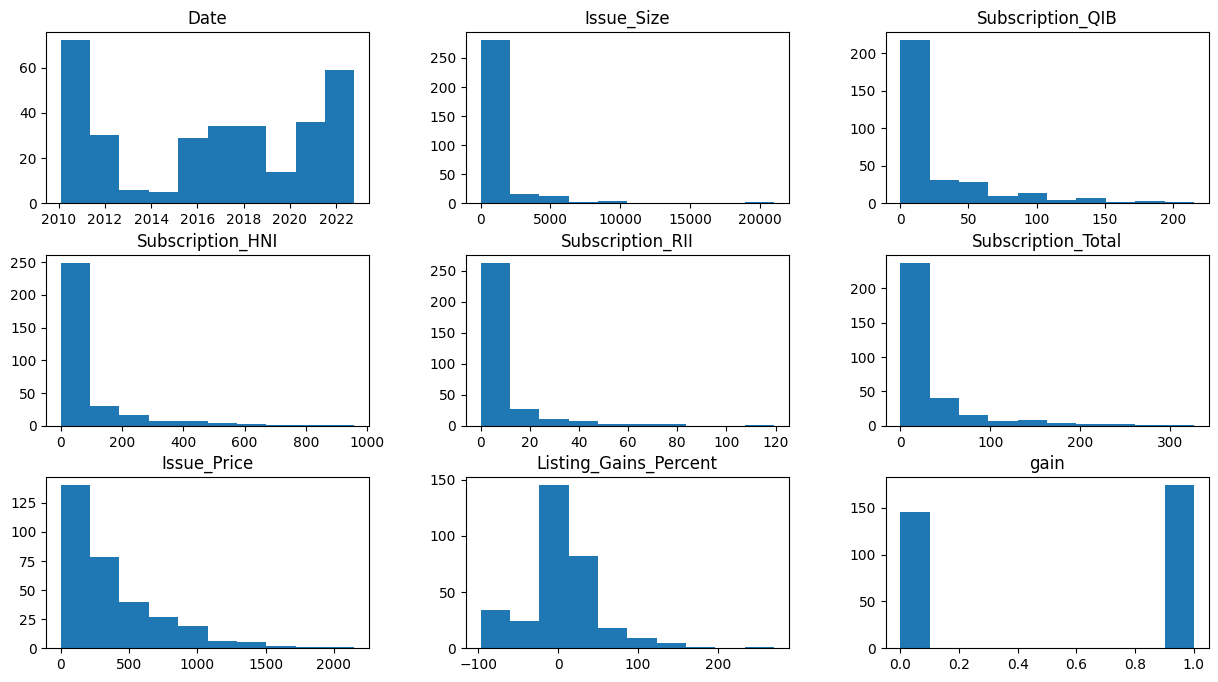

In [100]:
fig, ax = plt.subplots(figsize=(15,8))
df.hist(ax=ax, grid=False)
plt.show()

&emsp;Most of the variables are right-skewed.

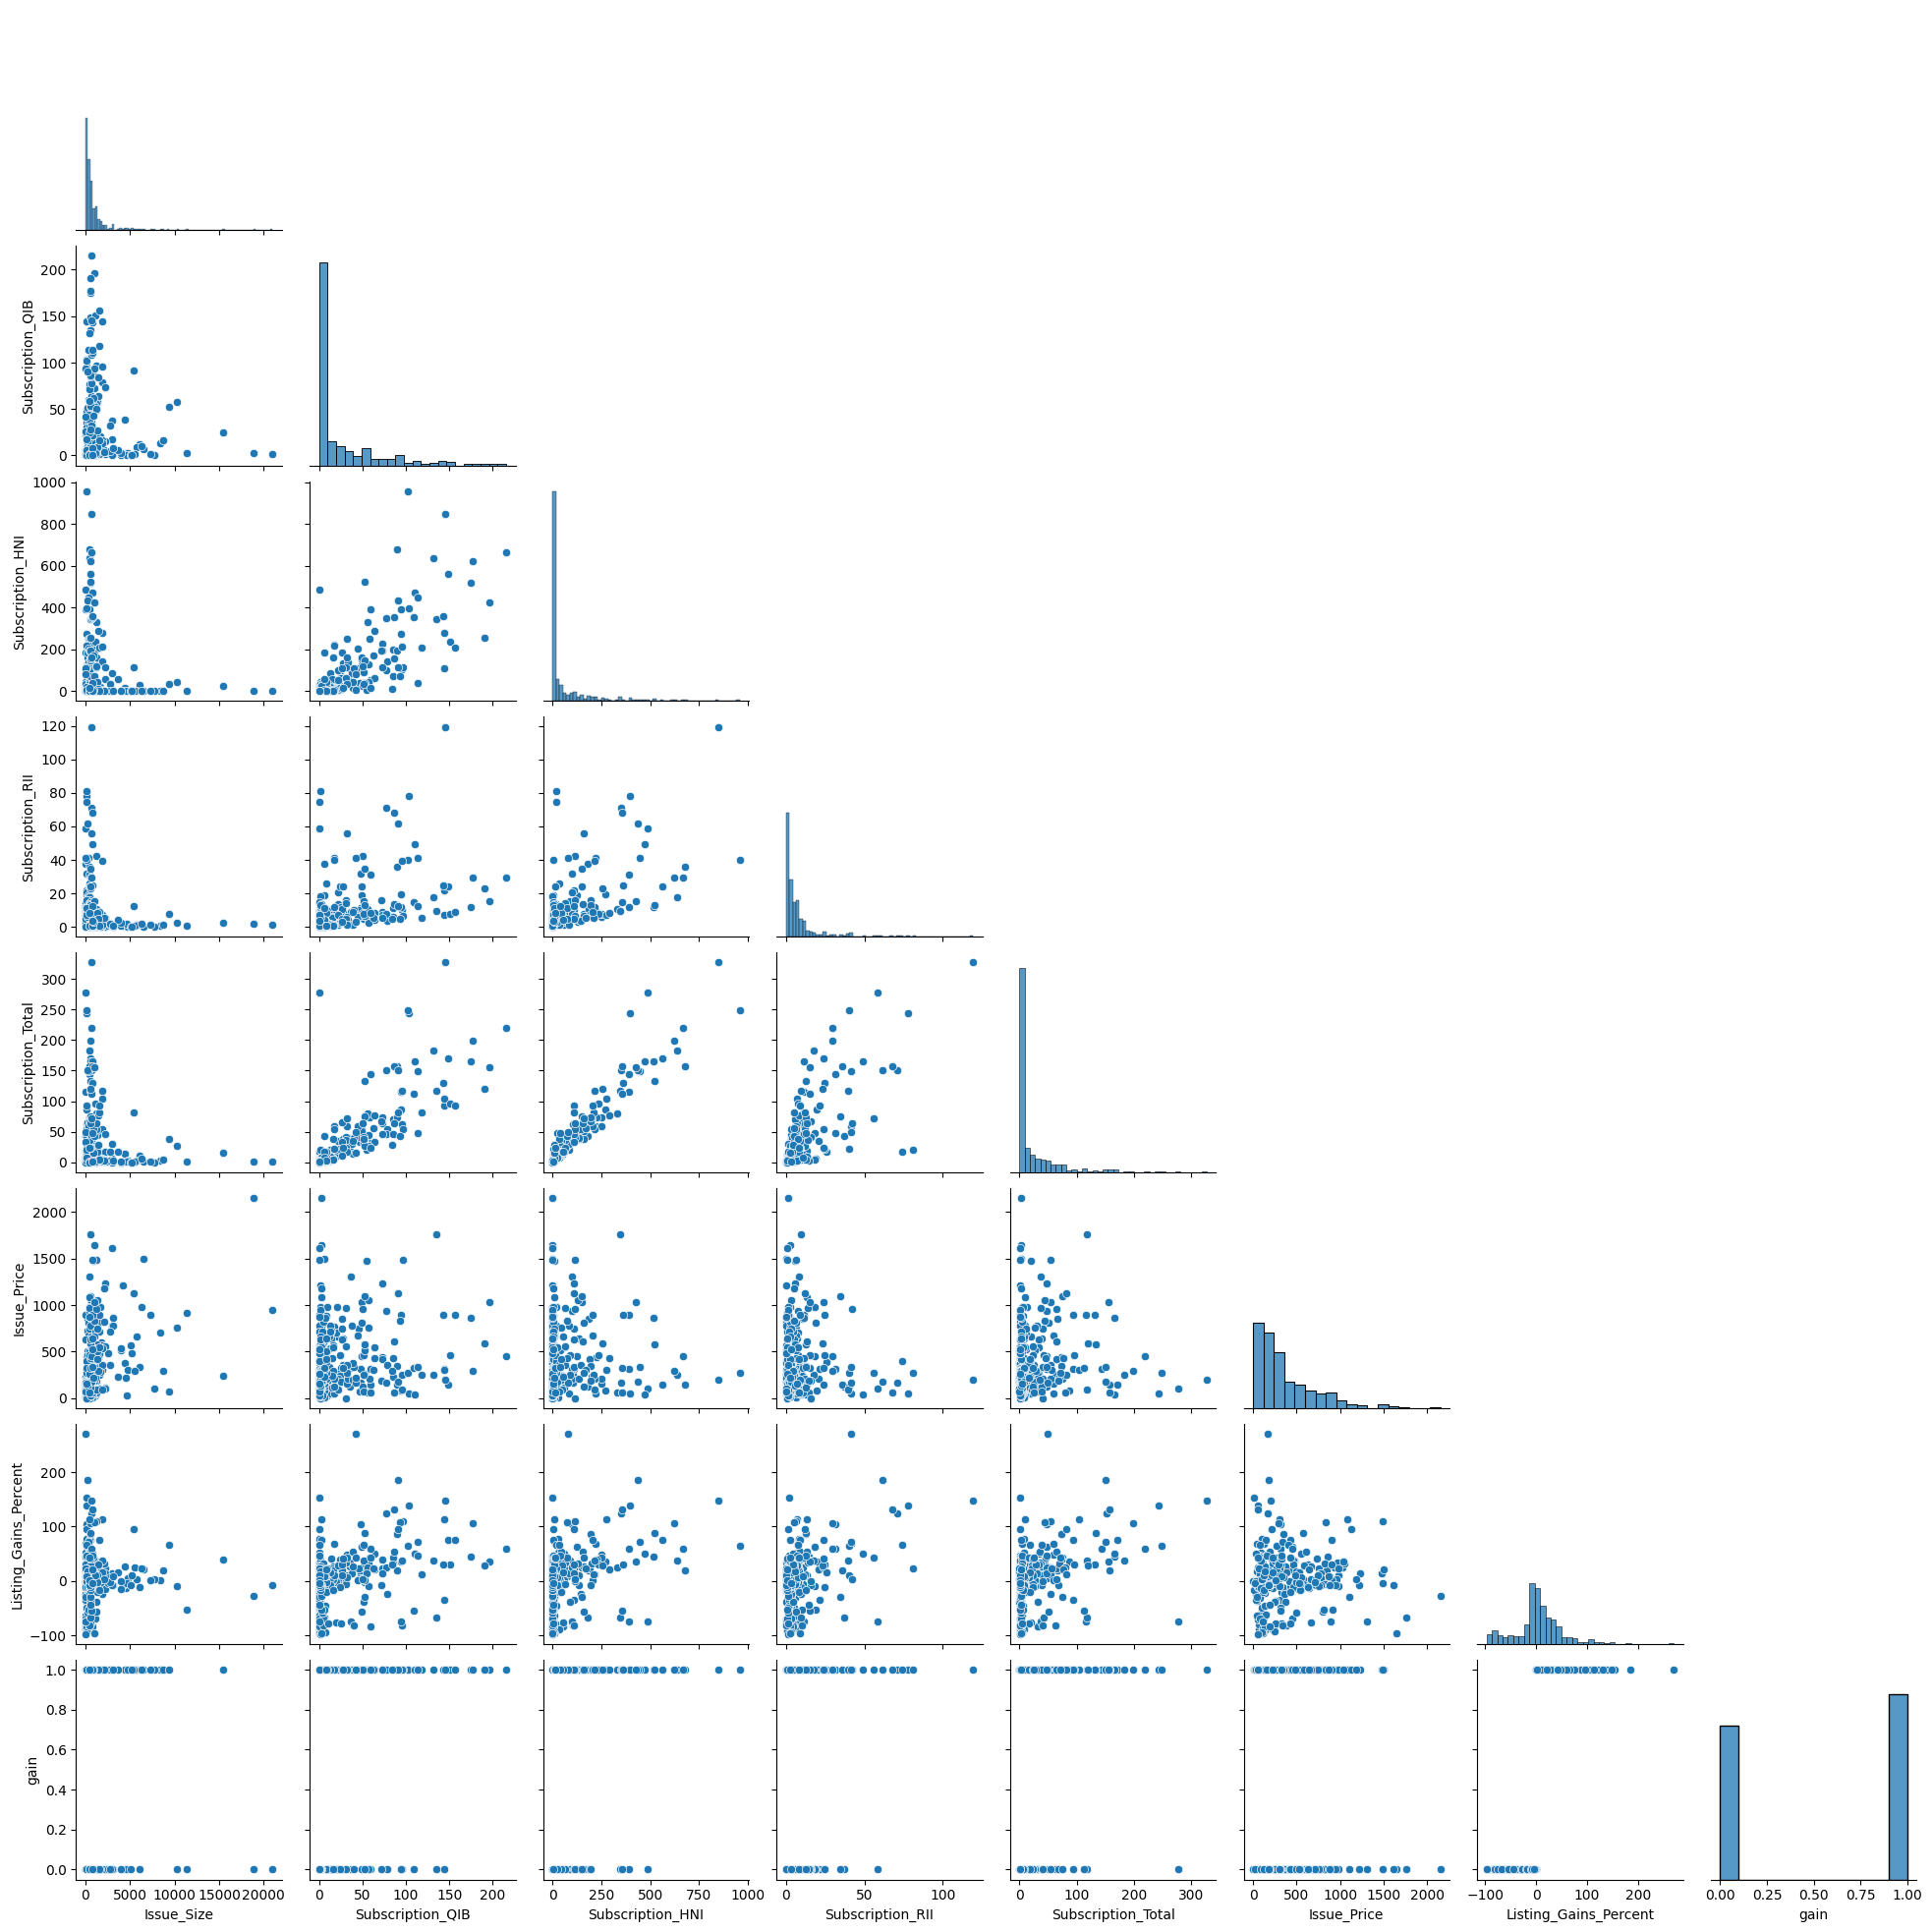

In [104]:
sns.pairplot(df, corner=True)

&emsp;Some positive relationships are found among the number of `subscription` from different aspects. The binary response variable `gain` also seems to have positive relationship with number of `subscription` where the more the number of `subscription`, the higher chance the `gain` is positive (1).

## `Date`<a id='date'></a>

In [21]:
df['Date '] = pd.to_datetime(df['Date '], format='%d/%m/%y')
df.rename(columns={'Date ':'Date'}, inplace=True)
df.head()

,Date,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,gain
0,2010-02-03,189.80,48.44,106.02,11.08,43.22,165,11.82,1
1,2010-02-08,328.70,59.39,51.95,3.79,31.11,145,-84.21,0
2,2010-02-15,56.25,0.99,16.60,6.25,5.17,75,17.13,1
3,2010-02-15,199.80,1.12,3.65,0.62,1.22,165,-11.28,0
4,2010-02-19,0.00,0.52,1.52,2.26,1.12,75,-5.20,0


In [22]:
df.columns

Index(['Date', 'Issue_Size', 'Subscription_QIB', 'Subscription_HNI',
       'Subscription_RII', 'Subscription_Total', 'Issue_Price',
       'Listing_Gains_Percent', 'gain'],
      dtype='object')

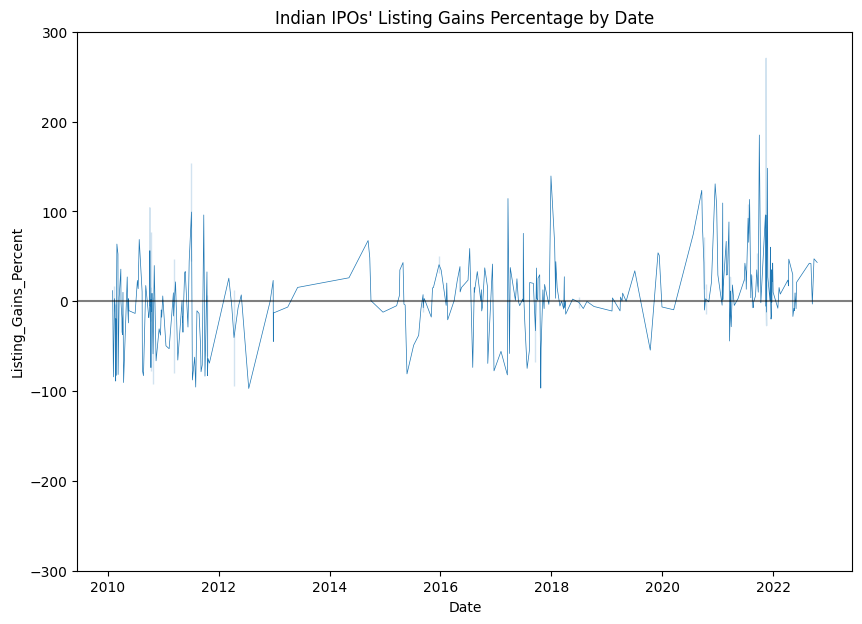

In [65]:
fig, ax = plt.subplots(figsize=(10,7))
plot = sns.lineplot(df, x='Date', y='Listing_Gains_Percent', lw=.5, ax=ax, legend=False)
plot.axhline(0, color='k', alpha=.5)
plot.set_ylim(-300,300)
plot.set(title="Indian IPOs' Listing Gains Percentage by Date")
plt.show()

&emsp;From year 2010 to 2020, the listing gains in percentage centered around 0. After 2020, apparently there were more IPOs with gains than losses.

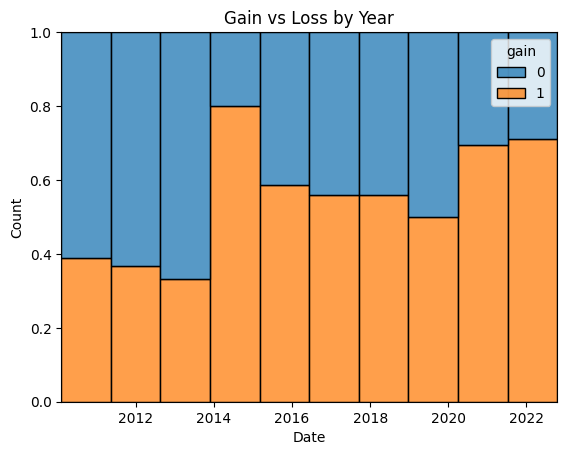

In [76]:
sns.histplot(df, x='Date', hue='gain', multiple='fill').set(title='Gain vs Loss by Year')
plt.show()

&emsp;The filled histogram confirms that there were more IPOs with gains than losses for the years after 2020. Besides, there appears a cycle where more IPOs had gains at the beginning of every 6 years approximately. Then it is followed by a gradual decrease in the ratio of Gain/Loss. However, since the objective of this project is to predict if a IPO would have an initial gain, apart from suggesting investment in 2026, `Date` in this project seems irrelevant.

## `Issue_Size`<a id='issue-size'></a>

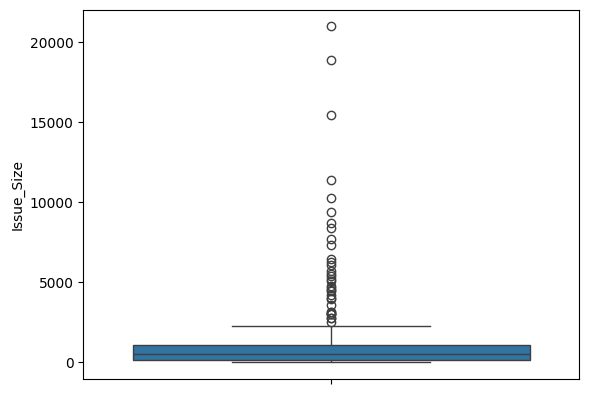

In [108]:
sns.boxplot(df, y='Issue_Size')
plt.show()

In [109]:
df.loc[df['Issue_Size']==df['Issue_Size'].max(),:]

,Date,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent,gain
307,2022-05-17,21000.0,1.7,1.39,1.14,1.64,949,-7.75,0


&emsp;There are many outliers in this predictor. However, the inputs were possibly valid as the greatest `Issue_Size` of 21000 INR crores actually took place on the correct `Date` as shown in [Indian Today](https://www.indiatoday.in/business/story/recap-at-india-biggest-ipos-lic-zomato-paytm-coal-india-as-hyundai-files-paper-for-public-listing-2554367-2024-06-17#). Thus, outliers remain unchanged.

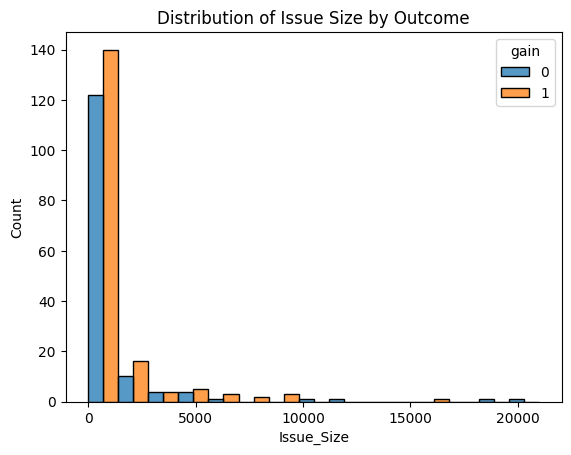

In [134]:
sns.histplot(df, x='Issue_Size', hue='gain', multiple='dodge', bins=15).set(title='Distribution of Issue Size by Outcome')
plt.show()

&emsp;There is no obvious difference between the two outcomes in this variable.

## `Subscription`<a id='subscription'></a>

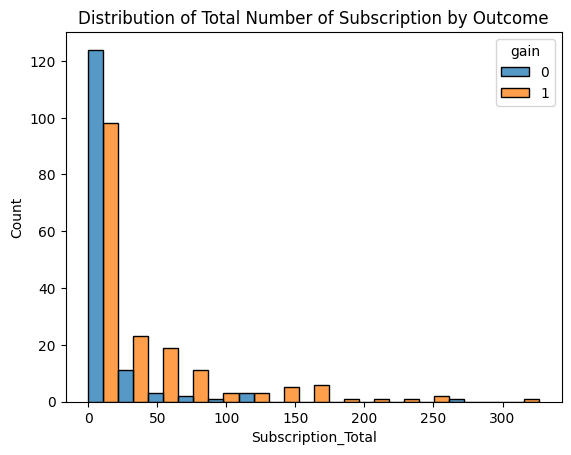

In [137]:
sns.histplot(df, x='Subscription_Total', hue='gain', multiple='dodge', bins=15).set(title='Distribution of Total Number of Subscription by Outcome')
plt.show()

&emsp;Previously in the pairplot, `Subscription_QIB`, `Subscription_HNI`, `Subscription_RII`, and `Subscription_Total` share similar distribution and relationship with the response variables `Listing_Gains_Percent` and `gain`. To reduce duplicated information, only the `Subscription_Total` is considered to take part in model training. The above histogram shows an increasing ratio of `Gain/Loss` over `subscription`.

## `Issue Price`<a id='price'></a>

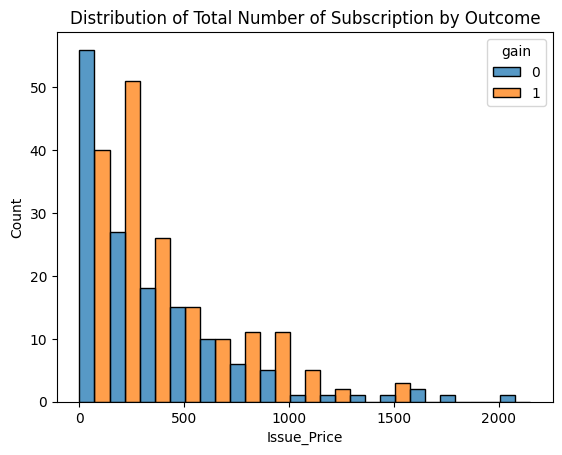

In [138]:
sns.histplot(df, x='Issue_Price', hue='gain', multiple='dodge', bins=15).set(title='Distribution of Total Number of Subscription by Outcome')
plt.show()

&emsp;As price goes over 1500, the IPOs tended to have losses rather than gains.  

&emsp;After some exploratory data analysis, only `Subscription_Total` and `Issue_Price` seem useful for classification model training.